In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [18]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Gender', ylabel='count'>

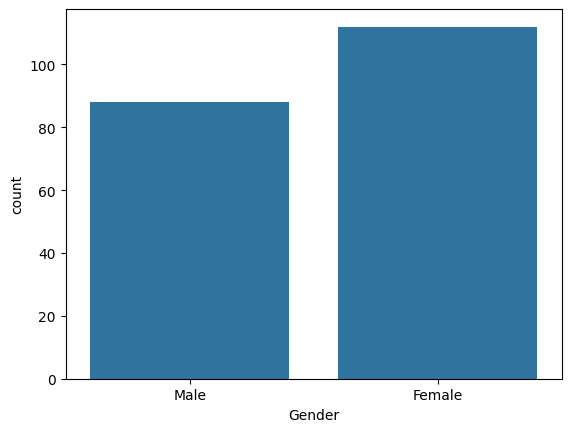

In [19]:
sns.countplot(x=df['Gender'])

In [22]:
# df.drop(['CustomerID','Gender','Age'],axis=1)
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
# No.of Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # init -> initialisation to start the algorithm
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # inertia used to calculate variance
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

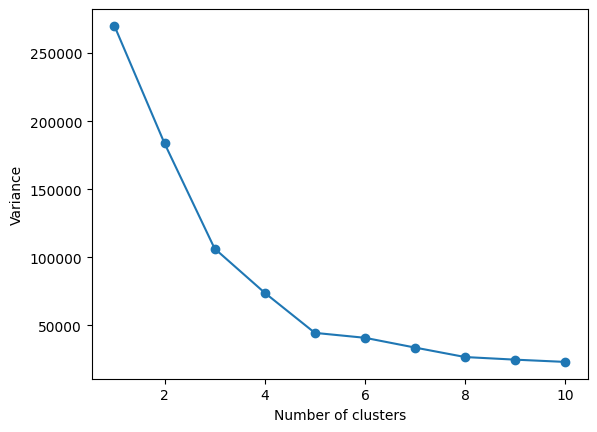

In [29]:
# k=[i for i in range(1,11)]
# plt.plot(k,wcss,marker='o')

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Variance")
plt.show()

#here 6 will be the elbow point
# if we choose 5 as elbow point no issue, but its in the start so there is a chance of occurance of error

In [31]:
kmeans_new=KMeans(n_clusters=6,init='k-means++',random_state=42)
kmeans_new.fit(x)
y_pred=kmeans_new.predict(x)
y_pred

array([5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 2,
       4, 2, 4, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 0,
       5, 2, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [32]:
x['Cluster']=y_pred
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,5
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,5
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


If we want to predict the o/p now we apply supervised ml here

In [33]:
input=x.iloc[:,:-1]
input

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [34]:
output=x.iloc[:,-1]
output

,Cluster
0,5
1,2
2,4
3,2
4,5
...,...
195,1
196,3
197,1
198,3


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.30,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 2, 4, 3, 3, 0, 0, 3, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 0, 5,
       3, 0, 0, 0, 0, 0, 1, 0, 2, 5, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 5, 4,
       0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[26,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 1,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  0,  3]])

In [39]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.9666666666666667

In [42]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         2
           5       1.00      0.75      0.86         4

    accuracy                           0.97        60
   macro avg       0.99      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60

